In [345]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd 

pd.options.display.max_rows = 999
# https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html

In [346]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)

In [347]:
df = pd.read_csv("tetraFrequency.csv")
display(df.head())
df.shape

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,0.000291,0.000566,0.000578,0.000459,0.000513,0.000375,0.000247,0.000784,0.000517,0.000220,...,0.000184,0.000628,0.000568,0.000110,0.000110,0.000390,0.000528,0.000296,0.000518,0.000283
1,0.000166,0.000113,0.000462,0.000401,0.000073,0.000075,0.000247,0.000348,0.000000,0.000550,...,0.000460,0.000471,0.000568,0.000329,0.000549,0.000078,0.000264,0.000532,0.000377,0.000606
2,0.000665,0.000396,0.000520,0.000287,0.000293,0.000751,0.000330,0.000348,0.000370,0.000440,...,0.000184,0.000393,0.000362,0.000165,0.000274,0.000468,0.000132,0.000177,0.000424,0.000202
3,0.000624,0.000509,0.000347,0.000229,0.000293,0.000300,0.000577,0.000697,0.000665,0.000330,...,0.000184,0.000393,0.000310,0.000220,0.000219,0.000546,0.000396,0.000414,0.000330,0.000162
4,0.000166,0.000396,0.000289,0.000229,0.000220,0.000601,0.000165,0.000436,0.000665,0.000385,...,0.000368,0.000393,0.000207,0.000274,0.000274,0.000312,0.000198,0.000118,0.000188,0.000040


(2936, 256)

In [348]:
X = df.to_numpy()
display(X)
display(X.shape)

y = [num for num in range(0,2936)]
len(y)

array([[0.00029113, 0.00056564, 0.00057807, ..., 0.00029556, 0.00051809,
        0.00028297],
       [0.00016636, 0.00011313, 0.00046245, ..., 0.00053201, 0.00037679,
        0.00060635],
       [0.00066545, 0.00039595, 0.00052026, ..., 0.00017734, 0.00042389,
        0.00020212],
       ...,
       [0.0004159 , 0.00033939, 0.00017342, ..., 0.00041378, 0.0001413 ,
        0.00044466],
       [0.00012477, 0.00039595, 0.00040465, ..., 0.00023645, 0.00028259,
        0.00040424],
       [0.00016636, 0.00039595, 0.00040465, ..., 0.00029556, 0.00023549,
        0.00028297]])

(2936, 256)

2936

In [356]:
z = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2936 samples in 0.294s...
[t-SNE] Computed neighbors for 2936 samples in 6.487s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2936
[t-SNE] Computed conditional probabilities for sample 2000 / 2936
[t-SNE] Computed conditional probabilities for sample 2936 / 2936
[t-SNE] Mean sigma: 0.000806
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.560463
[t-SNE] KL divergence after 1000 iterations: 2.721181


Text(-55, 15, 'Toxins/Trash')

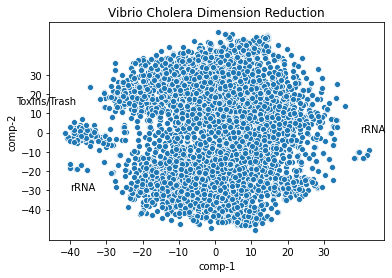

In [357]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

##########################

bottom_left = (z[:,0] < -33) & (z[:,1] < -11)
far_right = z[:,0] > 35
middle_left = (z[:,1] < 10) & (z[:,1] > -10) & (z[:,0] < -25)

alltogether = bottom_left | far_right | middle_left
##########################


df['color'] = alltogether
df['color'] = df['color'].astype('int')
df.head()

sns.scatterplot(x="comp-1", y="comp-2",
                       data=df).set(title="Vibrio Cholera Dimension Reduction", 
                             xticks=[x for x in range(-40,40, 10)],
                             yticks=[x for x in range(-40,40, 10)]) 
'''

plot = sns.scatterplot(x="comp-1", y="comp-2",
                       data=df, hue=df.color.tolist(),
                       palette=sns.color_palette("hls", 2)).set(title="Vibrio Cholera Dimension Reduction", 
                             xticks=[x for x in range(-60,60, 5)],
                             yticks=[x for x in range(-100,100, 10)]) 
'''

plt.text(40,0,'rRNA')
plt.text(-40, -30, 'rRNA')
plt.text(-55, 15, "Toxins/Trash")

In [95]:
#plt.savefig("Vibrio_Cholera_tSNE.png")

<Figure size 432x288 with 0 Axes>

In [69]:
df['color'] = middle_left
df['color'] = df['color'].astype('int')
df.head()

,y,comp-1,comp-2,color
0,0,10.845245,-12.159692,0
1,1,22.130840,-23.940817,0
2,2,-10.197120,-3.744754,0
3,3,-1.063221,-10.309160,0
4,4,28.109728,-28.594606,0


In [77]:
bottom_left = (z[:,0] < -33) & (z[:,1] < -11)
far_right = z[:,0] > 35
middle_left = (z[:,1] < 10) & (z[:,1] > -10) & (z[:,0] < -25)
df[ middle_left ]

,y,comp-1,comp-2,color
54,54,-37.367435,3.773123,1
56,56,-36.811428,-1.631629,1
57,57,-33.842182,-3.469730,1
58,58,-27.278339,-3.271122,0
59,59,-29.874750,-2.587281,0
64,64,-37.603085,3.071225,1
67,67,-35.882954,2.986134,1
111,111,-35.478718,-4.727273,1
112,112,-36.711697,-2.010358,1
121,121,-39.146259,2.710641,1


In [ ]:
# Lets grab the Toxins/Trash and TSNE that only

In [358]:
df = pd.read_csv("tetraFrequency.csv")
display(df.head())
df.shape

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,0.000291,0.000566,0.000578,0.000459,0.000513,0.000375,0.000247,0.000784,0.000517,0.000220,...,0.000184,0.000628,0.000568,0.000110,0.000110,0.000390,0.000528,0.000296,0.000518,0.000283
1,0.000166,0.000113,0.000462,0.000401,0.000073,0.000075,0.000247,0.000348,0.000000,0.000550,...,0.000460,0.000471,0.000568,0.000329,0.000549,0.000078,0.000264,0.000532,0.000377,0.000606
2,0.000665,0.000396,0.000520,0.000287,0.000293,0.000751,0.000330,0.000348,0.000370,0.000440,...,0.000184,0.000393,0.000362,0.000165,0.000274,0.000468,0.000132,0.000177,0.000424,0.000202
3,0.000624,0.000509,0.000347,0.000229,0.000293,0.000300,0.000577,0.000697,0.000665,0.000330,...,0.000184,0.000393,0.000310,0.000220,0.000219,0.000546,0.000396,0.000414,0.000330,0.000162
4,0.000166,0.000396,0.000289,0.000229,0.000220,0.000601,0.000165,0.000436,0.000665,0.000385,...,0.000368,0.000393,0.000207,0.000274,0.000274,0.000312,0.000198,0.000118,0.000188,0.000040


(2936, 256)

In [359]:
df_toxins = df[middle_left]
df_toxins.head()

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
54,0.000624,0.000170,0.000231,0.000401,0.000220,0.000225,0.000247,0.000087,0.000148,0.000275,...,0.000184,0.000864,0.000516,0.000439,0.000329,0.000780,0.000528,0.000887,0.000612,0.000889
56,0.000749,0.000226,0.000578,0.000688,0.000293,0.000150,0.000247,0.000348,0.000591,0.000220,...,0.000368,0.000707,0.000516,0.000220,0.000219,0.000468,0.000594,0.000650,0.000424,0.000889
57,0.000665,0.000453,0.000867,0.000573,0.000513,0.000300,0.000577,0.000523,0.000887,0.000440,...,0.000184,0.000471,0.000258,0.000329,0.000055,0.000156,0.000330,0.000118,0.000188,0.000445
58,0.000374,0.000509,0.000347,0.000229,0.000513,0.000225,0.000412,0.000348,0.000591,0.000275,...,0.000368,0.000628,0.000207,0.000274,0.000604,0.000234,0.000396,0.000473,0.000424,0.000404
59,0.000541,0.000396,0.000520,0.000630,0.000440,0.000225,0.000412,0.000174,0.000739,0.000660,...,0.000184,0.000471,0.000620,0.000220,0.000384,0.000468,0.000396,0.000296,0.000424,0.000404


In [360]:
X = df_toxins.to_numpy()
display(X)
display(X.shape)

y = [num for num in range(0,X.shape[0])]
len(y)

array([[0.00062386, 0.00016969, 0.00023123, ..., 0.00088668, 0.00061228,
        0.00088932],
       [0.00074863, 0.00022626, 0.00057807, ..., 0.00065023, 0.00042389,
        0.00088932],
       [0.00066545, 0.00045251, 0.0008671 , ..., 0.00011822, 0.00018839,
        0.00044466],
       ...,
       [0.00124771, 0.00033939, 0.00057807, ..., 0.00017734, 0.0001413 ,
        0.00024254],
       [0.00149726, 0.00022626, 0.00069368, ..., 0.0004729 , 0.00018839,
        0.00064678],
       [0.00166362, 0.00062221, 0.0008093 , ..., 0.00029556, 0.0001413 ,
        0.00032339]])

(105, 256)

105

In [377]:
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=13)

In [378]:
z = tsne.fit_transform(X)

[t-SNE] Computing 40 nearest neighbors...
[t-SNE] Indexed 105 samples in 0.000s...
[t-SNE] Computed neighbors for 105 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 105 / 105
[t-SNE] Mean sigma: 0.001079
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.346703
[t-SNE] KL divergence after 1000 iterations: 0.830487


'\nsns.scatterplot(x="comp-1", y="comp-2",\n                       data=df, hue=df.color.tolist(),\n                       palette=sns.color_palette("hls", 2)).set(title="Vibrio Cholera Dimension Reduction", \n                             xticks=[x for x in range(-200,200, 50)],\n                             yticks=[x for x in range(-500,1000, 100)]) \n'

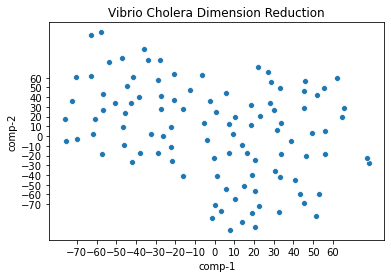

In [379]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]


##########################
outliers = (z[:,1] > 500) | (z[:,1] < -500)
offsection = z[:,0] < -70

alltogether = bottom_left | far_right | middle_left
##########################


df['color'] = offsection
df['color'] = df['color'].astype('int')


sns.scatterplot(x="comp-1", y="comp-2",
                       data=df).set(title="Vibrio Cholera Dimension Reduction", 
                             xticks=[x for x in range(-70,70, 10)],
                             yticks=[x for x in range(-70,70, 10)]) 

'''
sns.scatterplot(x="comp-1", y="comp-2",
                       data=df, hue=df.color.tolist(),
                       palette=sns.color_palette("hls", 2)).set(title="Vibrio Cholera Dimension Reduction", 
                             xticks=[x for x in range(-200,200, 50)],
                             yticks=[x for x in range(-500,1000, 100)]) 
'''



In [270]:
df[offsection]

,y,comp-1,comp-2,color
6,6,-74.327675,-48.829285,1
9,9,-79.304726,-13.245505,1
32,32,-94.340759,-11.072059,1
59,59,-93.054878,20.106691,1
60,60,-71.872452,-35.152317,1
69,69,-78.799400,20.749004,1
70,70,-85.553711,-58.343628,1
86,86,-88.478806,-68.613617,1
88,88,-108.826218,58.301872,1
90,90,-110.768173,50.186352,1


array([[0.00062386, 0.00016969, 0.00023123, ..., 0.00088668, 0.00061228,
        0.00088932],
       [0.00074863, 0.00022626, 0.00057807, ..., 0.00065023, 0.00042389,
        0.00088932],
       [0.00066545, 0.00045251, 0.0008671 , ..., 0.00011822, 0.00018839,
        0.00044466],
       ...,
       [0.00124771, 0.00033939, 0.00057807, ..., 0.00017734, 0.0001413 ,
        0.00024254],
       [0.00149726, 0.00022626, 0.00069368, ..., 0.0004729 , 0.00018839,
        0.00064678],
       [0.00166362, 0.00062221, 0.0008093 , ..., 0.00029556, 0.0001413 ,
        0.00032339]])